Checking something from 4.78 of QuantuM phase Transitions book


In [239]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import single_particle_sector as sps
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter

In [240]:
#Ground State Fidelity
def overlap(U,V):
    L = U.shape[0]//2
    U = U[:,:L]
    V = V[:,:L]
    overlap_matrix = U.conj().T @ V
    return la.det(overlap_matrix)
def evolve_TFIM_states(taus, N_steps, h0, hf, J, L):
    Ut_tau = []
    GS_T_tau = []
    times_tau = []

    for tau in taus:
        times = np.linspace(0, tau, N_steps)
        Ut = sps.TFIM_time_evolve(N_steps, tau, h0, hf, J, L)

        GS_T = []
        for ti in range(N_steps):
            h = sps.h_t(times[ti], tau, h0, hf)
            H = sps.H_bdg(h, L, J)
            _, V = la.eigh(H)
            GS_T.append(V)

        Ut_tau.append(Ut)
        GS_T_tau.append(GS_T)
        times_tau.append(times)

    return Ut_tau, GS_T_tau, times_tau



In [241]:
#Model Parameters
L = 30
J = -1
h0 = 0
hf = 5
taus = np.linspace(1,500,25)
N_steps = 500

#Time Evolved States:
Ut_tau,GS_T_tau,times_tau= evolve_TFIM_states(taus, N_steps, h0, hf, J, L);

/home/kristian/miniconda3/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `dtype`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


KeyboardInterrupt: 

In [ ]:
#i = time step
p_gs= []
p_t = []
for j in range(0,len(taus)):
    G_t =sps.G_tfim(Ut_tau[j][-1][:,:L])
    G_gs =sps.G_tfim(GS_T_tau[j][-1][:, :L])
    #fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]
    p_t +=[sps.sigma_general([0,1],G_t,L)]
    p_gs+=[sps.sigma_general([0,1],G_gs,L)]


p_gs = np.array(p_gs)
p_t = np.array(p_t)


/home/kristian/Desktop/Subsystem Loschmidt Echo/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] = M[Bx,Ay]


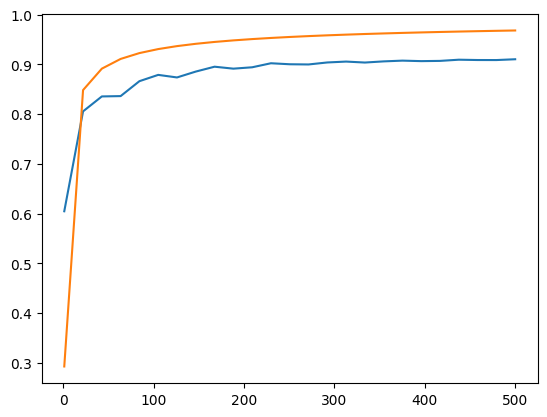

In [50]:
plt.plot(taus,1-p_t)
plt.plot(taus,1-1/np.sqrt(2*taus))
#plt.vlines(L**2/(2),0,1)


In [242]:
def h(t,tau):
    return 5*(1-t/tau)



In [243]:
from scipy.integrate import solve_ivp
import numpy as np

# Define RHS
def rhs(t, X, k, J, h, tau):
    u, v = X
    hi = h(t, tau)
    du = -1j * (2 * J * (hi - np.cos(k)) * u + 2 * J * np.sin(k) * v)
    dv = -1j * (-2 * J * (hi - np.cos(k)) * v + 2 * J * np.sin(k) * u)
    return [du, dv]

L = 20
J = -1.0
taus = np.linspace(.1,50,50)
k_vals = 2 * np.pi * (np.arange(-L//2, L//2) + 0.5) / L    



donttrust = []
for tau in taus:
    t_span = (0, tau)
    t_eval = np.linspace(*t_span, 1000)
    y0 = np.array([1.0, 0.0], dtype=complex)
    # Solve
    uv = []
    for k in k_vals:
        sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval, args=(k, J, h, tau))
        u = sol.y[0][-1]
        v = sol.y[1][-1]
        uv.append((u,v))

    donttrust.append(uv)

In [244]:
def positive_energy_spinor(k, g):
    uk = (g - np.cos(k)) + np.sqrt(g**2 - 2*g*np.cos(k) + 1)
    vk = np.sin(k)
    norm = np.sqrt(np.abs(uk)**2 + np.abs(vk)**2)
    return np.array([uk, vk]) / norm

positive_energy_spinor(k_vals[0],0)

array([ 0.99691733, -0.0784591 ])

In [245]:
dat= []
for j in range(len(taus)):
    d = []
    for i in range(len(k_vals)):
        uv = donttrust[j][i]
        x = positive_energy_spinor(k_vals[i],0)

        beta_k = np.abs(np.vdot(x,uv))**2

        d+= [beta_k]

    dat.append(np.sum(d)/L)

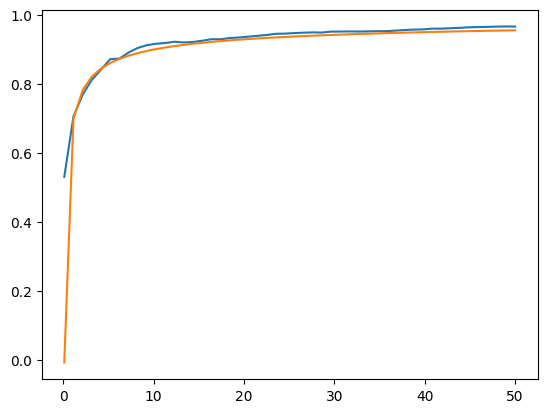

In [248]:
plt.plot(taus,dat)
plt.plot(taus,1-1/np.sqrt(taus)/np.pi)
#plt.hlines(1-np.exp(-2*np.pi**3*taus[-1]/L/L),0,100)

In [235]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100
J = 1.0
h = 0.5
k_vals = 2 * np.pi * (np.arange(L // 2) + 0.5) / L

# Arrays to store Bogoliubov coefficients
u_k = np.zeros(L // 2, dtype=complex)
v_k = np.zeros(L // 2, dtype=complex)

for i, k in enumerate(k_vals):
    eps_k = 2 * J * (h - np.cos(k))
    delta_k = 2 * J * np.sin(k)
    E_k = np.sqrt(eps_k**2 + delta_k**2)

    # Normalized eigenvector for positive energy eigenstate
    u = np.sqrt(0.5 * (1 + eps_k / E_k))
    v = -np.sign(delta_k) * np.sqrt(0.5 * (1 - eps_k / E_k))

    u_k[i] = u
    v_k[i] = v

# c_k = u_k * gamma_k + v_k * gamma_{-k}^\dagger for each k


In [ ]:
v_k

array([9.99014336e-01-0.j, 9.91221032e-01-0.j, 9.76105918e-01-0.j,
       9.54527084e-01-0.j, 9.27588524e-01-0.j, 8.96486265e-01-0.j,
       8.62377980e-01-0.j, 8.26295234e-01-0.j, 7.89099930e-01-0.j,
       7.51475650e-01-0.j, 7.13941163e-01-0.j, 6.76874880e-01-0.j,
       6.40542319e-01-0.j, 6.05122015e-01-0.j, 5.70727724e-01-0.j,
       5.37426347e-01-0.j, 5.05251816e-01-0.j, 4.74215519e-01-0.j,
       4.44313959e-01-0.j, 4.15534256e-01-0.j, 3.87858038e-01-0.j,
       3.61264134e-01-0.j, 3.35730404e-01-0.j, 3.11234949e-01-0.j,
       2.87756867e-01-0.j, 2.65276721e-01-0.j, 2.43776771e-01-0.j,
       2.23241079e-01-0.j, 2.03655503e-01-0.j, 1.85007637e-01-0.j,
       1.67286708e-01-0.j, 1.50483448e-01-0.j, 1.34589965e-01-0.j,
       1.19599601e-01-0.j, 1.05506794e-01-0.j, 9.23069521e-02-0.j,
       7.99963257e-02-0.j, 6.85718953e-02-0.j, 5.80312649e-02-0.j,
       4.83725662e-02-0.j, 3.95943714e-02-0.j, 3.16956154e-02-0.j,
       2.46755264e-02-0.j, 1.85335646e-02-0.j, 1.32693695e-02-